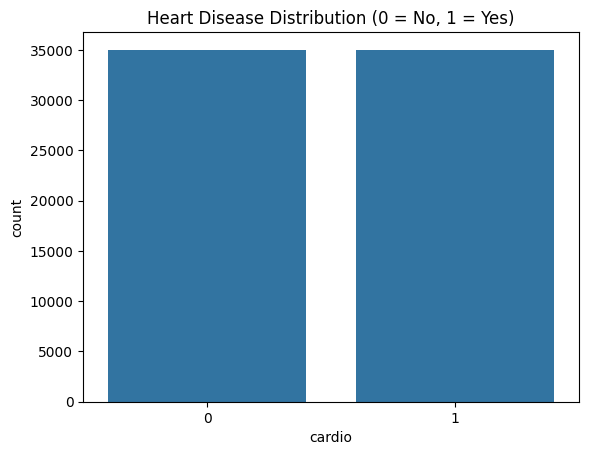

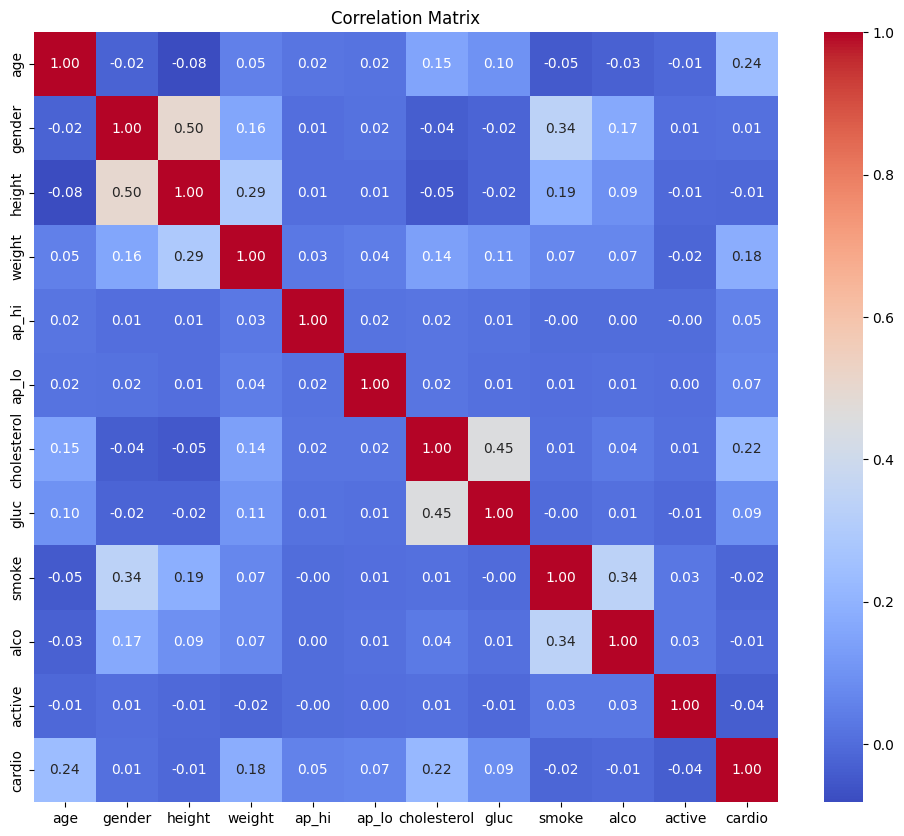

Model Accuracy Results:

Logistic Regression: 0.7227
K-Nearest Neighbors: 0.6533
Support Vector Machine: 0.7323
Decision Tree: 0.6349
Random Forest: 0.7086


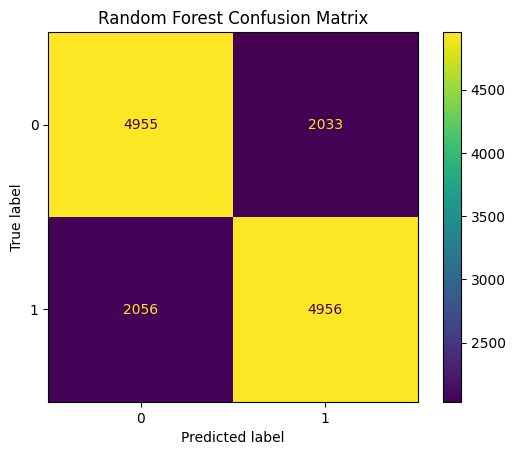

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6988
           1       0.71      0.71      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



['cardio_model.pkl']

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("cardio_train_corrected(1).csv")

df.drop("id", axis=1, inplace=True)
df["age"] = (df["age"] / 365).astype(int)

sns.countplot(x="cardio", data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

X = df.drop("cardio", axis=1)
y = df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

print("Model Accuracy Results:\n")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name}: {accuracy:.4f}")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
import joblib
joblib.dump(model, "cardio_model.pkl")